<a href="https://colab.research.google.com/github/Aditya-1717/Intro-to-Machine-Learning/blob/main/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
diabetes = pd.read_csv(url)

Epoch 20/120  Train Loss=0.6157  Val Loss=0.6199
Epoch 40/120  Train Loss=0.5330  Val Loss=0.5533
Epoch 60/120  Train Loss=0.4545  Val Loss=0.5086
Epoch 80/120  Train Loss=0.4342  Val Loss=0.5105
Epoch 100/120  Train Loss=0.4189  Val Loss=0.5124
Epoch 120/120  Train Loss=0.4016  Val Loss=0.5170


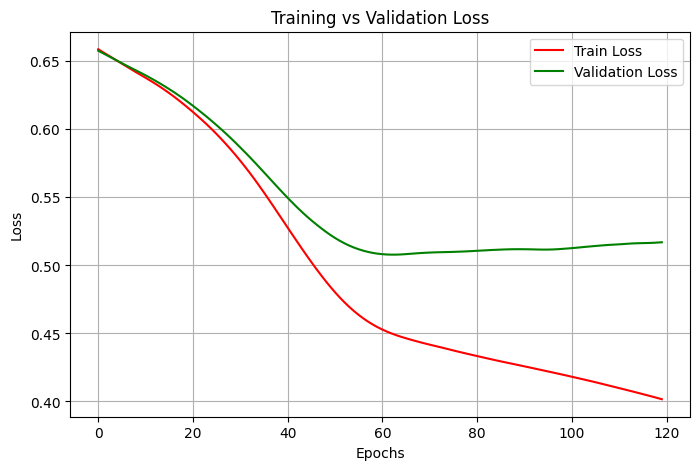


Model Performance:
Accuracy:  0.7078
Precision: 0.5957
Recall:    0.5185
F1 Score:  0.5545

Logistic Regression
Accuracy : 0.7143
Precision: 0.6087
Recall   : 0.5185
F1 Score : 0.5600

Support Vector Machine
Accuracy : 0.7597
Precision: 0.6735
Recall   : 0.6111
F1 Score : 0.6408


In [ ]:
inputs = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = diabetes[inputs].values
Y = diabetes['Outcome'].values
m = len(Y)

X_0 = np.ones((m, 1))
X = np.hstack((X_0, X))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

Xtra = torch.tensor(X_train, dtype=torch.float32)
Ytra = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1)
Xt = torch.tensor(X_test, dtype=torch.float32)
Yt = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1)

class NNet(nn.Module):
    def __init__(self, input_size):
        super(NNet, self).__init__()
        self.model = nn.Sequential(nn.Linear(input_size, 64), nn.ReLU(),
                                   nn.Linear(64, 32), nn.ReLU(),
                                   nn.Linear(32, 16), nn.ReLU(),
                                   nn.Linear(16, 1))
    def forward(self, x):
        return self.model(x)

model = NNet(Xtra.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 120
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(Xtra)
    loss = criterion(outputs, Ytra)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_output = model(Xt)
        val_loss = criterion(val_output, Yt)
        val_losses.append(val_loss.item())

    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}  Train Loss={loss.item():.4f}  Val Loss={val_loss.item():.4f}")

plt.figure(figsize=(8,5))
plt.plot(train_losses, color = 'red', label="Train Loss")
plt.plot(val_losses, color = 'green', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()


model.eval()
with torch.no_grad():
    logits = model(Xt).numpy().flatten()
    preds = (1 / (1 + np.exp(-logits))) >= 0.5

y_true = Y_test
y_pred = preds.astype(int)

acc_nn = accuracy_score(y_true, y_pred)
prec_nn = precision_score(y_true, y_pred, zero_division=0)
rec_nn = recall_score(y_true, y_pred, zero_division=0)
f1_nn = f1_score(y_true, y_pred, zero_division=0)

print("\nModel Performance:")
print(f"Accuracy:  {acc_nn:.4f}")
print(f"Precision: {prec_nn:.4f}")
print(f"Recall:    {rec_nn:.4f}")
print(f"F1 Score:  {f1_nn:.4f}")

log = LogisticRegression(max_iter=500)
log.fit(X_train, Y_train)
log_pred = log.predict(X_test)

print("\nLogistic Regression")
print(f"Accuracy : {accuracy_score(Y_test, log_pred):.4f}")
print(f"Precision: {precision_score(Y_test, log_pred, zero_division=0):.4f}")
print(f"Recall   : {recall_score(Y_test, log_pred, zero_division=0):.4f}")
print(f"F1 Score : {f1_score(Y_test, log_pred, zero_division=0):.4f}")

svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

print("\nSupport Vector Machine")
print(f"Accuracy : {accuracy_score(Y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(Y_test, svm_pred, zero_division=0):.4f}")
print(f"Recall   : {recall_score(Y_test, svm_pred, zero_division=0):.4f}")
print(f"F1 Score : {f1_score(Y_test, svm_pred, zero_division=0):.4f}")

Epoch 20/120  Train Loss=0.5419  Val Loss=0.5308
Epoch 40/120  Train Loss=0.1211  Val Loss=0.1373
Epoch 60/120  Train Loss=0.0432  Val Loss=0.0853
Epoch 80/120  Train Loss=0.0263  Val Loss=0.0935
Epoch 100/120  Train Loss=0.0171  Val Loss=0.1074
Epoch 120/120  Train Loss=0.0116  Val Loss=0.1214


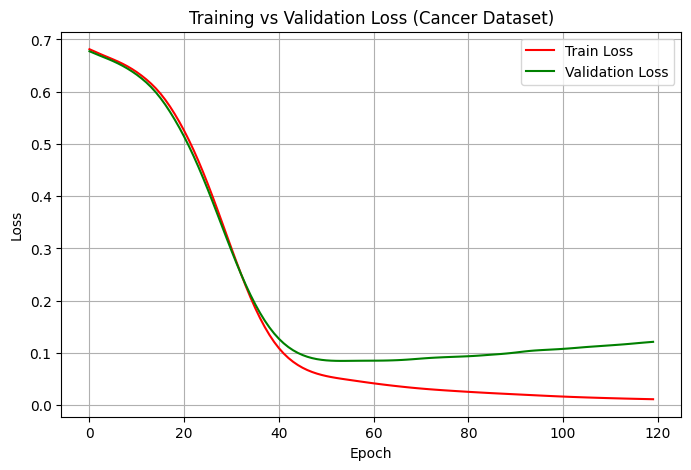


Breast Cancer Model Performance:
Accuracy:  0.9649
Precision: 0.9857
Recall:    0.9583
F1 Score:  0.9718

Logistic Regression
Accuracy : 0.9825
Precision: 0.9861
Recall   : 0.9861
F1 Score : 0.9861

Support Vector Machine
Accuracy : 0.9825
Precision: 0.9861
Recall   : 0.9861
F1 Score : 0.9861


In [ ]:
#Problem 2
data = load_breast_cancer()
X = data.data
Y = data.target
m = len(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Xtra = torch.tensor(X_train, dtype=torch.float32)
Ytra = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1)
Xt = torch.tensor(X_test, dtype=torch.float32)
Yt = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1)

class CancerNet(nn.Module):
    def __init__(self, input_dim):
        super(CancerNet, self).__init__()
        self.model = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(),
                                   nn.Linear(128, 64), nn.ReLU(),
                                   nn.Linear(64, 32), nn.ReLU(),
                                   nn.Linear(32, 16), nn.ReLU(),
                                   nn.Linear(16, 1))
    def forward(self, x):
        return self.model(x)

model = CancerNet(Xtra.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 120
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(Xtra)
    loss = criterion(outputs, Ytra)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_output = model(Xt)
        val_loss = criterion(val_output, Yt)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}  Train Loss={loss.item():.4f}  Val Loss={val_loss.item():.4f}")

plt.figure(figsize=(8,5))
plt.plot(train_losses, color = 'red', label="Train Loss")
plt.plot(val_losses, color = 'green', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (Cancer Dataset)")
plt.legend()
plt.grid()
plt.show()

model.eval()
with torch.no_grad():
    logits = model(Xt).numpy().flatten()
    probs = 1 / (1 + np.exp(-logits))
    preds = (probs >= 0.5).astype(int)

acc = accuracy_score(Y_test, preds)
prec = precision_score(Y_test, preds, zero_division=0)
rec = recall_score(Y_test, preds, zero_division=0)
f1 = f1_score(Y_test, preds, zero_division=0)

print("\nBreast Cancer Model Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

log = LogisticRegression(max_iter=500)
log.fit(X_train, Y_train)
log_pred = log.predict(X_test)

print("\nLogistic Regression")
print(f"Accuracy : {accuracy_score(Y_test, log_pred):.4f}")
print(f"Precision: {precision_score(Y_test, log_pred, zero_division=0):.4f}")
print(f"Recall   : {recall_score(Y_test, log_pred, zero_division=0):.4f}")
print(f"F1 Score : {f1_score(Y_test, log_pred, zero_division=0):.4f}")

svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

print("\nSupport Vector Machine")
print(f"Accuracy : {accuracy_score(Y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(Y_test, svm_pred, zero_division=0):.4f}")
print(f"Recall   : {recall_score(Y_test, svm_pred, zero_division=0):.4f}")
print(f"F1 Score : {f1_score(Y_test, svm_pred, zero_division=0):.4f}")


In [ ]:
#Problem 3a
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

#This will load the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

#This will create a hidden layer
class Hidden(nn.Module):
    def __init__(self):
        super(Hidden, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3072, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        return self.fc2(x)

modelA = Hidden().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelA.parameters(), lr=0.001)

#This is our training function
def evaluate_accuracy(model, loader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            max_values, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

    #I picked 20 eopchs due to my laptop not being able to handle large amounts
    epochs = 20

for epoch in range(epochs):
    modelA.train()
    start_time = time.time()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = modelA(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_time = time.time() - start_time
    train_loss = running_loss / len(train_loader)
    acc = evaluate_accuracy(modelA, test_loader)

    print(f"Epoch {epoch+1}/{epochs} | Time: {epoch_time:.3f}s | "f"Training Loss: {train_loss:.4f} | Test Accuracy: {acc:.4f}")

In [ ]:
#Problem 3b
#3 hidden layers this time
class Hidden_3(nn.Module):
    def __init__(self):
        super(Hidden_3, self).__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3072, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

modelB = Hidden_3().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelB.parameters(), lr=0.001)
#This questions requires 300 epochs, otherwise I would have tried to do
#less due to my laptop limitations
epochs = 300

for epoch in range(epochs):
    modelB.train()
    start_time = time.time()

    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelB(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_time = time.time() - start_time
    train_loss = running_loss / len(train_loader)
    acc = evaluate_accuracy(modelB, test_loader)

    print(f"Epoch {epoch+1}/{epochs} | Time: {epoch_time:.3f}s | "f"Training Loss: {train_loss:.4f} | Test Accuracy: {acc:.4f}")